In [1]:
import torch
from training.FiretraceMLP import FiretraceMLP

model = FiretraceMLP()
compiled_model = torch.compile(model)
checkpoint = torch.load("../models/firetrace_model.pt")

compiled_model.load_state_dict(checkpoint['model_state_dict'])
compiled_model.eval()

OptimizedModule(
  (_orig_mod): FiretraceMLP(
    (layers): Sequential(
      (0): Linear(in_features=9, out_features=40, bias=True)
      (1): ReLU()
      (2): Linear(in_features=40, out_features=40, bias=True)
      (3): ReLU()
      (4): Linear(in_features=40, out_features=40, bias=True)
      (5): ReLU()
      (6): Linear(in_features=40, out_features=1, bias=True)
      (7): Sigmoid()
    )
  )
)

In [2]:
import pandas as pd

df = pd.read_csv("../data/gen_2/processed/with_fire_area_soi_weather_time.csv")

# Pick last 500 rows
df = df.tail(500)

y = df["fire_area"]
y = y.reset_index()["fire_area"]
X = df.drop("fire_area", axis=1)

In [3]:
import joblib

x_scaler = joblib.load("../models/x_scaler.save")
y_scaler = joblib.load("../models/y_scaler.save")

x_scaled = x_scaler.transform(X)

In [4]:
test_output = compiled_model(x_scaled)

test_output

tensor([[0.0849],
        [0.0763],
        [0.0667],
        [0.0810],
        [0.0811],
        [0.0921],
        [0.0812],
        [0.0623],
        [0.0792],
        [0.0905],
        [0.0968],
        [0.0608],
        [0.0582],
        [0.0727],
        [0.0947],
        [0.0981],
        [0.0877],
        [0.0751],
        [0.0754],
        [0.0920],
        [0.0996],
        [0.0677],
        [0.0551],
        [0.0743],
        [0.0734],
        [0.0646],
        [0.0657],
        [0.0845],
        [0.0752],
        [0.1347],
        [0.1322],
        [0.1794],
        [0.0761],
        [0.0699],
        [0.0582],
        [0.0737],
        [0.1084],
        [0.1452],
        [0.0710],
        [0.0710],
        [0.0710],
        [0.0935],
        [0.1048],
        [0.1799],
        [0.0640],
        [0.0792],
        [0.1143],
        [0.1109],
        [0.0779],
        [0.1474],
        [0.1893],
        [0.1707],
        [0.0784],
        [0.0583],
        [0.0661],
        [0

In [5]:
# Unscale the output

y_unscaled = y_scaler.inverse_transform(test_output.detach().numpy())

y_unscaled

array([[1113.60872546],
       [1000.28920057],
       [ 875.57734348],
       [1062.01216579],
       [1063.8887503 ],
       [1208.00189533],
       [1064.51008483],
       [ 817.7760819 ],
       [1038.6999195 ],
       [1187.01014416],
       [1269.33508928],
       [ 798.39384953],
       [ 764.23032351],
       [ 954.35132456],
       [1241.84151291],
       [1285.57283843],
       [1150.56275018],
       [ 985.59193829],
       [ 989.21307273],
       [1205.67568114],
       [1305.20964732],
       [ 888.8781061 ],
       [ 724.09527368],
       [ 975.25378678],
       [ 962.63835769],
       [ 847.9115692 ],
       [ 862.66999709],
       [1108.63024126],
       [ 987.10160453],
       [1764.84708532],
       [1731.9952322 ],
       [2349.39448462],
       [ 998.35822692],
       [ 917.65721486],
       [ 763.78515792],
       [ 966.60658663],
       [1420.06064112],
       [1902.00479489],
       [ 932.20247418],
       [ 931.5009966 ],
       [ 931.87362476],
       [1225.762

In [7]:
# Calculate MAE

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_unscaled)

490.2435735639025

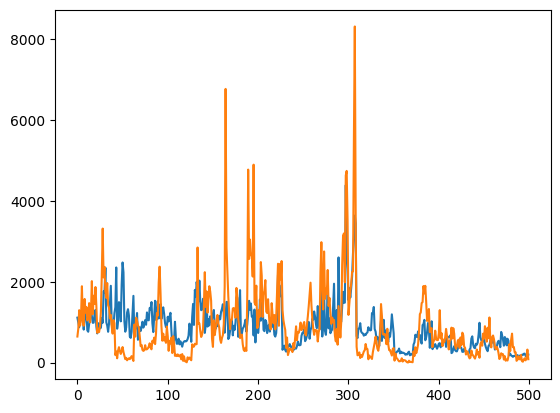

In [6]:
# Graph output vs actual

import matplotlib.pyplot as plt

plt.plot(y_unscaled, label="Predicted")
plt.plot(y, label="Actual")